<div align="center">

## A Python Finte Volume Method for 2-D Heat Conduction <br><br><br>

**Andres Enriquez Fernandez** <br>
Department of Mechanical Engineering, The University of Texas El Paso <br><br><br>


<div style="text-align: justify"> 

<font size = "4"> **Abstract** </font> The use of numerical methods has grown with the increase in computational power. Computational fluid mechanics is a field that is taking full advantage of new computer technologies to approximate complex governing differential equations that could not be otherwise solved by analytical methods. A Python programming language code is developed to solve a fluid mechanics 2-D heat conduction problem by using the difussion governing equation for steady state.  

</div>

</div>
<br>

## Introduction
Diffusion problems appear in many engineering applications. Many applications where fluids are involved, and the bulk fluid velocity is zero must include the effects of diffusion. The effect of diffusion must be included even when the fluid velocity is significant as diffusion always occurs together with convection (Shukla, et. al., 2012).

The diffusion equation is a partial differential equation that describes the changes of concentration of a desired quantity whish can be matter, momentum or energy with respect to space and time. Diffusion occurs from an area of high concentration to a location of less concentration. One such quantities is heat and the heat equation describes how the heat difuses or distributes within a given region over time.  

In this work, the Finite Volume Method (FVM) is employed to evaluate a differential equation representing a heat conduction problem. First, the differential equation is represented in algebraic form. Integrating the governing equations over a finite volume provides the integral conservation law, which is the basis of the FVM ("Chapter 16 Finite," n.d.). Then, the Python programing language is used to solve the algebraic equations using the NumPy's linear algebra function. The solution provides the temperature field distribution on the plate. 

## Background 
The increase in accessibility to computer power has allowed for computer simulation tools to emerge as a crucial component in the advancement of today's science and technology. Computational Fluid Dynamics (CFD) is a computer simulation tool that had its roots in the aeronautics and aerospace industry. Due the advantages it brings to innovative design, its applications have grown to many design-intensive industries like automotive, power generation, nuclear, and lately the electronics industry among many others (Moukalled, et.al., 2016). 

The FVM is a numerical method that is crucial for the implementation of CFD. The process starts by generating a discretized geometric domain into finite volumes or cells. The differential equations are then discretized into a set of algebraic equations. The equations are integrated over the generated control volumes. The final step is to solve the algebraic equations at each cell of the geometric domain. It is important to mention that the FVM is strictly conservative which makes a preferred choice for CFD (Moukalled, et.al., 2016).

## Problem Statement 
The finite volume method is used to evaluate the two-dimensional steady state diffusion equation for a heat conduction problem:
$$ \dfrac{\partial}{\partial x} \biggl(\Gamma \dfrac{\partial \phi}{\partial x}\biggr) + \dfrac{\partial}{\partial y} \biggl(\Gamma \dfrac{\partial \phi}{\partial y}\biggr) + S_{\phi}=0 \tag 1$$
Consider a $0.3\,m$ width by $0.4\,m$ height plate of $1\,cm$ in thickness with a thermal conductivity $\kappa\,=\,1000\,W/mK$. The boundary conditions include a steady heat flux of $800\,kW/m^2$ with insulated south and east boundaries and a constant north boundary temperature of $100\,\degree C$, see Figure 1. The two-dimensional steady state diffusion equation above is to be applied to calculate the steady state temperature distribution on the plate.<br>
<p align="center">
<img src="Problem_Statement_Plate.png" alt="Plate Diagram" style="width:300px;height:300px;"/>
<figcaption align = "center"><b>Fig.1 - Plate diagram with boundary conditions. (Versteeg & Malalasekera, 2007)</b></figcaption>


## Methodology
The governing equation for two-dimensional steady state conduction is <br>
$$ \dfrac{\partial}{\partial x} \biggl(\kappa \dfrac{\partial T}{\partial x}\biggr) + \dfrac{\partial}{\partial y} \biggl(\kappa \dfrac{\partial T}{\partial y}\biggr) + S=0 \tag 2$$
Where $\kappa$ is the thermal conductivity of the material and $T$ is the temperature and $S$ represents the source term.
The domain is now discretized per following two-dimensional control volume to solve the discretized equations. <br><br>

<p align="center">
<img src="Methodology_Grid_2.png" alt="2d Grid used" style="width:300px;height:200px;"/>
<figcaption align = "center"><b>Fig.2 - Two-dimensional grid structure. (Versteeg & Malalasekera, 2007)</b></figcaption> <br>

As it can be seen in Figure 2, a general point P is surrounded by nodes at the West, East, North and South locations. Thus, the control volume around a general point P is bounded by its respective East, West, North, and South boundaries.    
Integrating the conduction equation above over the control volume in Figure 2 yields the discretized equations at P.
$$ \biggl[\kappa_e A_e \biggl(\dfrac{\partial T}{\partial x}\biggr)_e-\kappa_w A_w \biggl(\dfrac{\partial T}{\partial x}\biggr)_w \biggr]+\biggl[\kappa_n A_n \biggl(\dfrac{\partial T}{\partial y}\biggr)_n-\kappa_s A_s \biggl(\dfrac{\partial T}{\partial y}\biggr)_s\biggl]+\overline S\Delta V=0 \tag 3$$ 

Where A is the cross section area and the subscript represents the East(e), West(w), North(n), and South(s) boundary locations. The term $\overline S\Delta V$ is the average of the source quantity over the control volume. 

For this case, the thermal conductivity $\kappa$ is constant. Also, acknowledging the mesh size is uniform along the respective x and y directions and collecting the temperature at each node terms yields the following discretized equation. 
$$ \biggl(\kappa \biggl(\frac{A_w}{\Delta x}+\frac{A_e}{\Delta x}+\frac{A_n}{\Delta y} +\frac{A_s}{\Delta y} \biggr) - S_p \biggr)T_p= \kappa \biggl(\frac{A_w}{\Delta x}T_w+\frac{A_e}{\Delta x}T_e+\frac{A_n}{\Delta y}T_n+\frac{A_s}{\Delta y}T_s \biggr)+S_u \tag 4 $$

At internal nodes: 

- $S_u=S_p=0$

At boundary nodes:

If temperature bodunary condition exists:

- $S_u=S_{u\,last} + 2\kappa (A_{boundary}/\delta_{boundary}) T_{boundary}$ \
where $S_{u\,last}=0$ for initial value

- $S_p=S_{p\,last}-2\kappa(A_{boundary}/\delta_{boundary})$ \
where $S_{p\,last}=0$ for initial value 

If heat flux boundary condition exists:  

- $S_u=S_{u\,last} + q_{boundary}A_{boundary}$ \
where $S_{u\,last}=0$ for initial value

- $S_p=S_{p\,last}$\
where $S_{p\,last}=0$ for initial value  

<br> <br> <br>

## Results

The resulting temperature distribution on the plate is shown in Figure 3.  The domain was discretized into a mesh of 50 by 50 2-D four node quad elements. The solution time for this problem was less than a second for this mesh size. Increasing the mesh to 100 by 100 elements increases the run time to > 10 seconds and the maximum temperature output remains within 0.3%. No further refining test were performed as results do not change and a 50 by 50 size mesh provides a quick solution with good resolution and smooth temperature contours accross the plate. <br><br>


<p align="center">
<img src="Results_code.png" alt="Results Code" style="width:400px;height:300px;"/>
<figcaption align = "center"><b>Fig.3 - Temperature distribution results (Versteeg & Malalasekera, 2007)</b></figcaption> <br>


The results show a temperature of 100 $\degree$ at the top (north) boundary as specified by the problem statement. The plate reaches a maximum temperature of 281 $\degree C$  at the west boundary caused by a steady heat flux $q$ of $800\,kW/m^2$. From the West face, the temperature dissipates to the rest of the plate in all directions towards the North, East and South faces. The minimum temperature in the plate occurs at the North face due to the boundary condition constraint of 100 $\degree C$. 

## Conclusion

The FVM is successfully applied to solve a steady state diffusion problem with a heat source. The code provides a flexible environment to make variable boundary condition scenarios. For the heat conduction problem solved using this method a heat source was introduced at the west face of the plate as well as a constant temperature condition at the North face. The East and South faces were left insulated. As expected, the temperature distribution results on the plate show a constant temperature of a 100 $\degree C$ at the top of the plate corresponding to the constant temperature boundary condition. The Temperature reaches a maximum value at the West face (where the heat source is implemented) at the bottom edge of the face. The temperature then diffused and reduces in value to a 100 $\degree C$ at the North face and to increasing temperature values at the isolated faces. Future work can be done to expand the application of the code to include convection effects by including the velocity terms in the Navier-Stokes equations. Furthermore, the time dependent terms can also be added to solve unsteady problems were time behavior of the modeled dependent variable is important.  


<div style="page-break-after: always;"></div>

## References

[1] Kumar, V. (2021). Fundamentals of Computational Fluid Dynamics. The University of Texas El Paso. Deptartment of Mechanical Engineering. 

[2] Versteeg, H. K., &amp; Malalasekera, W. (2007). An introduction to computational fluid dynamics: The Finite Volume Approach (Second). Prentice Hall.  

[3] Moukalled, F., Mangani, L., &amp; Darwish, M. (2016). The finite volume method in Computational Fluid Dynamics: An advanced introduction with openfoam and Matlab. Springer. 

[4] Shukla, A., Singh, A. K., &amp; Singh, P. (2012). A comparative study of finite volume method and finite difference method for convection-diffusion problem. American Journal of Computational and Applied Mathematics, 1(2), 67–73. https://doi.org/10.5923/j.ajcam.20110102.13 

[5] Massachusetts Institute of Technology. (n.d.). Chapter 16 Finite Volume Methods. Retrieved November 29, 2021, from http://web.mit.edu/16.90/BackUp/www/pdfs/Chapter16.pdf. 

<div style="page-break-after: always;"></div>

## Apendix

import matplotlib.pyplot as plt
import numpy as np
import json

Lx=0.3; Ly=0.4; n = 50; m = 50; nn=n*m; # Geom descretization/mesh
Ta=None; Tb=None; Tc=None; Td=100; # BCs
k=1000;  # Properties
 
dx = Lx/n;  dy = Ly/m;   

x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])

dz=0.01;  G=k; qa=500000; qb=0; qc=0; qd=0; 

for j in range(m): 
     for i in range(n): 
        P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n; 
        Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sp=0; Sua=qa*Aw; Sub=qb*Ae; Suc=qc*As; Sud=qd*An; 
        aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy;
        if(i>0): 
            A[P,W]=-aW; 
        else: 
            if Ta:
                aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;  
            else:
                aW=0; Sp=Sp; Su=Sua + Su;
     
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            if Tb:
                aE=0; Sp=Sp-2*G*Ae/dx; Su=Su + 2*G*Ae/dx*Tb;
            else:
                aE=0; Sp=Sp; Su=Sub + Su;
        if(j>0): 
            A[P,S]=-aS; 
        else:
            if Tc:
                aS=0; Sp=Sp-2*G*As/dy; Su=Su + 2*G*As/dy*Tc;
            else:
                aS=0; Sp=Sp; Su=Suc + Su;           
        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            if Td:
                aN=0; Sp=Sp-2*G*An/dy; Su=Su + 2*G*An/dy*Td;
            else:
                aN=0; Sp=Sp; Su=Sud + Su;           
        aP = aW + aE + aS + aN - Sp; 
        A[P,P] = aP; 
        #print(A[P,P])
        #print(aP)
        b[P]=Su; 

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];
        
fig = plt.figure()
plt.contourf(X, Y, d2)
plt.colorbar()
plt.show()

print("Max Temp =",max(d))
print(d)

<div style="page-break-after: always;"></div>



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

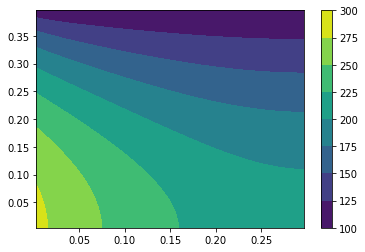

Max Temp = 280.9169266773112


In [4]:
Lx=0.3; Ly=0.4; n = 50; m = 50; nn=n*m; # Geom descretization/mesh
Ta=None; Tb=None; Tc=None; Td=100; # BCs
k=1000;  # Properties
 
dx = Lx/n;  dy = Ly/m;   

x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])

dz=0.01;  G=k; qa=500000; qb=0; qc=0; qd=0; 

for j in range(m): 
     for i in range(n): 
        P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n; 
        Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sp=0; Sua=qa*Aw; Sub=qb*Ae; Suc=qc*As; Sud=qd*An; 
        aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy;
        if(i>0): 
            A[P,W]=-aW; 
        else: 
            if Ta:
                aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;  
            else:
                aW=0; Sp=Sp; Su=Sua + Su;
     
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            if Tb:
                aE=0; Sp=Sp-2*G*Ae/dx; Su=Su + 2*G*Ae/dx*Tb;
            else:
                aE=0; Sp=Sp; Su=Sub + Su;
        if(j>0): 
            A[P,S]=-aS; 
        else:
            if Tc:
                aS=0; Sp=Sp-2*G*As/dy; Su=Su + 2*G*As/dy*Tc;
            else:
                aS=0; Sp=Sp; Su=Suc + Su;           
        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            if Td:
                aN=0; Sp=Sp-2*G*An/dy; Su=Su + 2*G*An/dy*Td;
            else:
                aN=0; Sp=Sp; Su=Sud + Su;           
        aP = aW + aE + aS + aN - Sp; 
        A[P,P] = aP; 
        #print(A[P,P])
        #print(aP)
        b[P]=Su; 

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];
        
fig = plt.figure()
plt.contourf(X, Y, d2)
plt.colorbar()
plt.show()

print("Max Temp =",max(d))
#print(d)

## Problem Statement 
The finite volume method is used to evaluate the two dimensional steady state diffusion equation for a heat condution problem:
$$ \dfrac{\partial}{\partial x} \biggl(\Gamma \dfrac{\partial \phi}{\partial x}\biggr) + \dfrac{\partial}{\partial y} \biggl(\Gamma \dfrac{\partial \phi}{\partial y}\biggr) + S_{\phi}=0$$
Consider a $0.3\,m$ width by $0.4\,m$ height plate of $1\,cm$ in thickness with a thermal conductivity $\kappa\,=\,1000\,W/mK$. The boundary conditions include a steady heat flux of $800\,kW/m^2$ with insulated south and east boundaris and a constant noth boaundary temperature of $100\,\degree C$, see Figure 1. The two-dimensional steady state diffusion equation above is to be applied to calculate the steady state temprearture distrubution on the plate.  
<p align="center">
<img src="Problem_Statement_Plate.png" alt="Plate Diagram" style="width:300px;height:300px;"/>
<figcaption align = "center"><b>Fig.1 - Plate diagram with boundary conditions. (Versteeg & Malalasekera, 2007)</b></figcaption>

## Methodology
The governing equation for two-dimensional steady state conduction is
$$ \dfrac{\partial}{\partial x} \biggl(\kappa \dfrac{\partial T}{\partial x}\biggr) + \dfrac{\partial}{\partial y} \biggl(\kappa \dfrac{\partial T}{\partial y}\biggr) + S=0$$
Where $\kappa$ is the thermal conductity of the material and $T$ is the temperature and $S$ represents the source term.

The domain is now discretized per following two dimensional control volume to solve the discretized equations. 
<p align="center">
<img src="Methodology_Grid.png" alt="2d Grid used" style="width:300px;height:300px;"/>
<figcaption align = "center"><b>Fig.2 - Two dimenson grid structure employed. (Versteeg & Malalasekera, 2007)</b></figcaption>

As it can be seen in Figure 2, a general point P is surrounded by nodes at the West, East, Noth and South locations. Thus, the control volume around a general point P is bounded by its respective Eest,West,North, and South boundaries.    
Integrating the conduction equation above over the control volume in Figure 2 yields the discretized equations at P.
$$ \biggl[\kappa_e A_e \biggl(\dfrac{\partial T}{\partial x}\biggr)_e-\kappa_w A_w \biggl(\dfrac{\partial T}{\partial x}\biggr)_w \biggr]+\biggl[\kappa_n A_n \biggl(\dfrac{\partial T}{\partial y}\biggr)_n-\kappa_s A_s \biggl(\dfrac{\partial T}{\partial y}\biggr)_s\biggl]+\overline S\Delta V=0 $$ 

Where A is the cross section area and the subscript represents the East(e), West(w), Noth(n), and South(s) boundary locations. The term $\overline S\Delta V$ is the average of the source quantity over the control volume. 

For this case, the thermal conductivity $\kappa$ is constant. Also, acknowledging the mesh size is uniform along the respective x and y directions and collecting the temperature at each node terms yields the following discretized equation. 
$$ \biggl(\kappa \biggl(\frac{A_w}{\Delta x}+\frac{A_e}{\Delta x}+\frac{A_n}{\Delta y} +\frac{A_s}{\Delta y} \biggr) - S_p \biggr)T_p= \kappa \biggl(\frac{A_w}{\Delta x}T_w+\frac{A_e}{\Delta x}T_e+\frac{A_n}{\Delta y}T_n+\frac{A_s}{\Delta y}T_s \biggr)+S_u $$

At internal nodes: 

- $S_u=S_p=0$

At boundary nodes:

If temperature bodunary condition exists:

- $S_u=S_{u\,last} + 2\kappa (A_{boundary}/\delta_{boundary}) T_{boundary}$ \
where $S_{u\,last}=0$ for initial value

- $S_p=S_{p\,last}-2\kappa(A_{boundary}/\delta_{boundary})$ \
where $S_{p\,last}=0$ for initial value 

If heat flux boundary condition exists:  

- $S_u=S_{u\,last} + q_{boundary}A_{boundary}$ \
where $S_{u\,last}=0$ for initial value

- $S_p=S_{p\,last}\
where $S_{p\,last}=0$ for initial value  

## Results

The resulting temperature distribution on the plate is shown in Figure 3. The results show a temperature of 100 $\degree$ at the top (north) boundary as specified by the problem statement. The plate reaches a maximum temperature of 281 $\degree$ at the west boundary caused by a steady heat flux $q$ of $800\,kW/m^2$.

<p align="center">
<img src="Results_code.png" alt="Results Code" style="width:400px;height:300px;"/>
<figcaption align = "center"><b>Fig.3 - Temperature distribution results (Versteeg & Malalasekera, 2007)</b></figcaption>

## Referneces
Versteeg, H. K., &amp; Malalasekera, W. (2007). An introduction to computational fluid dynamics: The Finite Volume Approach (Second). Prentice Hall. 

